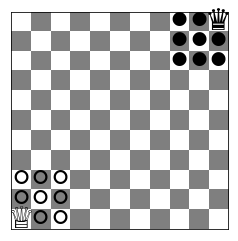

In [13]:
from operator import add
from enum import Enum

import matplotlib.pyplot as plt
import numpy as np

class Turn(Enum):
    WHITE = 1
    BLACK = 2

def draw_board(white_pieces, black_pices):

    # Create board and colors
    board = np.zeros((11,11,3))
    board += 0.5 
    board[::2, ::2] = 1 
    board[1::2, 1::2] = 1

    _, ax = plt.subplots()
    ax.imshow(board, interpolation='nearest')

    white_queen = white_pieces.pop(0)
    ax.text(white_queen[1], white_queen[0], u'\u2655', size=30, ha='center', va='center')

    for y, x in white_pieces:
        ax.text(x, y, u'\u26aa', size=30, ha='center', va='center')

    black_queen = black_pices.pop(0)
    ax.text(black_queen[1], black_queen[0], u'\u265b', size=30, ha='center', va='center')

    for y, x in black_pices:
        ax.text(x, y, u'\u26ab', size=30, ha='center', va='center')

    ax.set(xticks=[], yticks=[])
    ax.axis('image')

    plt.show()

white_positions = [(10,0),(8,0),(8,1),(8,2),(9,0),(9,1),(9,2),(10,1),(10,2)]
black_positions = [(0,10),(0,8),(0,9),(1,8),(1,9),(1,10),(2,8),(2,9),(2,10)]

draw_board(white_positions, black_positions)

class board:
    
    def __init__(self):
        self.white_pawns = set(x for x in [(8,0),(8,1),(8,2),(9,0),(9,1),(9,2),(10,1),(10,2)])
        self.white_queen = (10,0)
        self.white_queen_shield = set(x for x in [(9,0),(9,1),(10,1)])
        self.black_pawns = set(x for x in [(0,8),(0,9),(1,8),(1,9),(1,10),(2,8),(2,9),(2,10)])
        self.black_queen = (0,10)
        self.black_queen_shield = set(x for x in [(0,1),(1,1),(1,0)])
        self.turn = Turn.WHITE

    def set_board(self, white, black, turn):
        self.white_queen = white[0]
        self.white_pawns = white[1]
        self.white_queen_shield = self.update_queen_shield(self.white_queen)
        self.black_queen = black[0]
        self.black_pawns = black[1]
        self.black_queen_shield = self.update_queen_shield(self.black_queen)
        self.turn = turn

    def get_board(self):
        #return(([self.white_queen] + list(self.white_pawns)),[self.black_queen] + list(self.black_pawns))
        return( (self.white_queen,self.white_pawns),(self.black_queen, self.black_pawns))

    def update_queen_shield(self, queen_position):
        moves = [(-1,0),(-1,1),(0,1),(1,1),(1,0),(1,-1),(0,-1),(-1,-1)]
        return set([ tuple(map(add, move, queen_position)) for move in moves])
    
    def current_postions(self):
        return (self.white_positions, self.black_positions)
    
    def pawn_moves(self, pawn, turn):

        moves = []

        if turn == Turn.WHITE:
            if pawn[0] > 0:
                moves.append((pawn[0] - 1, pawn[1]))
            if pawn[1] < 10:
                moves.append((pawn[0], pawn[1] + 1))

        else:
            if pawn[0] < 10:
                moves.append((pawn[0] + 1, pawn[1]))
            if pawn[1] > 0:
                moves.append((pawn[0], pawn[1] - 1))

        return moves

    def queen_moves(self,turn):

        boards = []

        if turn == Turn.WHITE:
            queen = self.white_queen
            your_pawns = self.white_pawns
            oponent_pawns = self.black_pawns
            end_cell = (0,10)
            directions = [(-1,0),(0,1)]
            queen_shield = self.white_queen_shield
            opponent_queen_shield = self.black_queen_shield
        else:
            queen = self.black_queen        
            your_pawns = self.black_pawns
            oponent_pawns = self.white_pawns
            end_cell = (10,0)
            directions = [(1,0),(0,-1)]
            queen_shield = self.black_queen_shield
            opponent_queen_shield = self.white_queen_shield

        for direction in directions:
            
            x_move = direction[0] + queen[0]
            y_move = direction[1] + queen[1]

            while (x_move,y_move) in your_pawns:

                x_move = direction[0] + x_move
                y_move = direction[1] + y_move

            if (x_move,y_move) == end_cell:
                return True

            if  0 <= x_move <= 10 and \
                0 <= y_move <= 10 and \
                len(queen_shield.intersection(oponent_pawns)) == 0 and \
                len(queen_shield.intersection(opponent_queen_shield)) == 0:
                    if self.turn == Turn.WHITE:
                        boards.append(((x_move,y_move),self.white_pawns,self.black_queen,self.black_pawns))
                    else:
                        boards.append((self.white_queen,self.white_pawns,(x_move,y_move),self.black_pawns))

        return boards

    def next_boards(self):

        boards = []

        if self.turn == Turn.WHITE:
            your_queen = self.white_queen
            your_pawns = self.white_pawns
            oponent_pawns = self.black_pawns
            opponent_queen_shield = self.black_queen_shield
        else:
            your_queen = self.black_queen
            your_pawns = self.black_pawns
            oponent_pawns = self.white_pawns    
            opponent_queen_shield = self.white_queen_shield

        # Pawns move
        for pawn in your_pawns:    
            pawn_moves = self.pawn_moves(pawn, self.turn)
            for pawn_move in pawn_moves:
                if  pawn_move != (0,10) and \
                    pawn_move not in  your_pawns and \
                    pawn_move != your_queen and \
                    pawn_move not in opponent_queen_shield:
                        
                        new_your_pawns = your_pawns.copy()
                        new_oponent_pawns = oponent_pawns.copy() 
                        
                        if pawn_move in oponent_pawns:
                            # Remove the killed black pawn if exists
                            new_oponent_pawns = oponent_pawns.difference(pawn_move)

                        # Move the white pawn
                        new_your_pawns.remove(pawn)
                        new_your_pawns.add(pawn_move)

                        if self.turn == Turn.WHITE:
                            boards.append((self.white_queen,new_your_pawns,self.black_queen,new_oponent_pawns))
                        else:
                            boards.append((self.white_queen,new_oponent_pawns,self.black_queen,new_your_pawns))
        
        boards = boards + self.queen_moves(self.turn)
        return boards

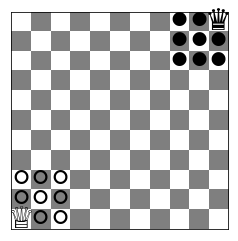

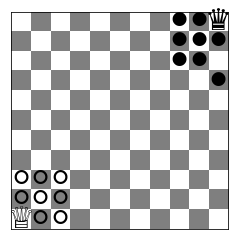

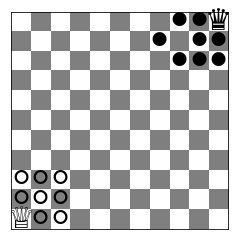

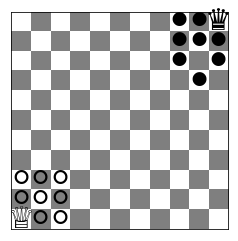

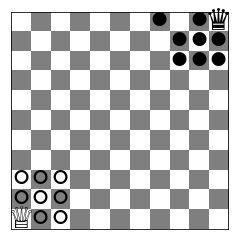

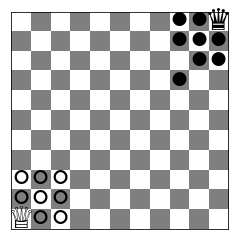

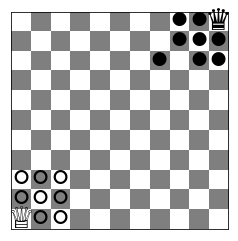

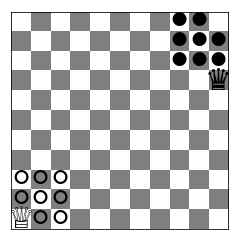

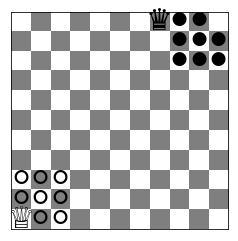

In [12]:
b = board()
white_pieces, black_pieces = b.get_board()
draw_board([white_pieces[0]] + list(white_pieces[1]), [black_pieces[0]] + list(black_pieces[1]))

b.set_board(white_pieces, black_pieces, Turn.BLACK)

new_boards = b.next_boards()

for nb in new_boards:
    draw_board([nb[0]] + list(nb[1]), [nb[2]] + list(nb[3]))


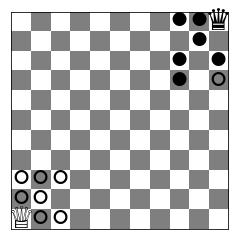

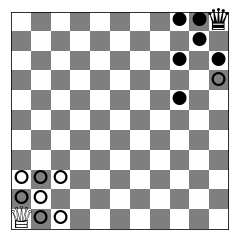

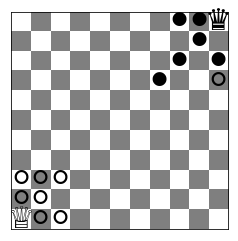

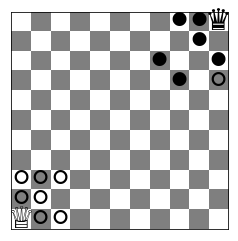

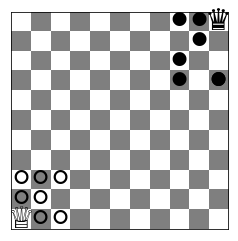

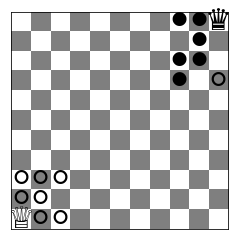

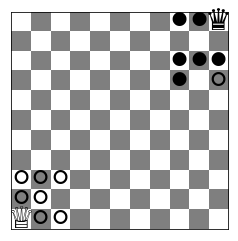

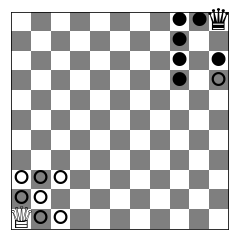

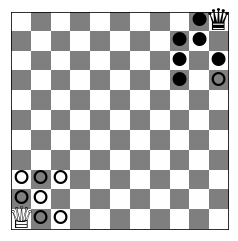

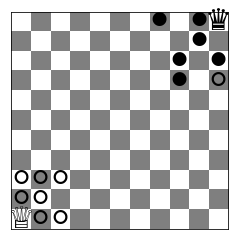

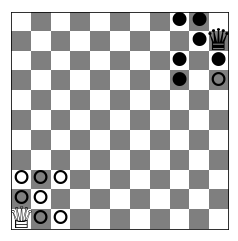

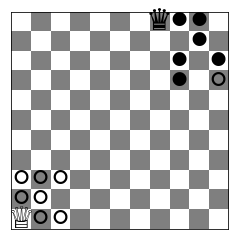

In [14]:
b.set_board(((10, 0), {(9, 0), (8, 1), (10, 1), (3, 10), (8, 0), (8, 2), (9, 1), (10, 2)}), 
            ((0, 10), {(2, 10), (3, 8), (0, 9), (0, 8), (1, 9), (2, 8)}), 
            Turn.BLACK)

white_pieces, black_pieces = b.get_board()
draw_board([white_pieces[0]] + list(white_pieces[1]), [black_pieces[0]] + list(black_pieces[1]))

new_boards = b.next_boards()

for b in new_boards:
    draw_board([b[0]] + list(b[1]), [b[2]] + list(b[3]))